## Real Estate Price Predictor

In [1]:
import pandas as pd
housing = pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285118,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705506,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

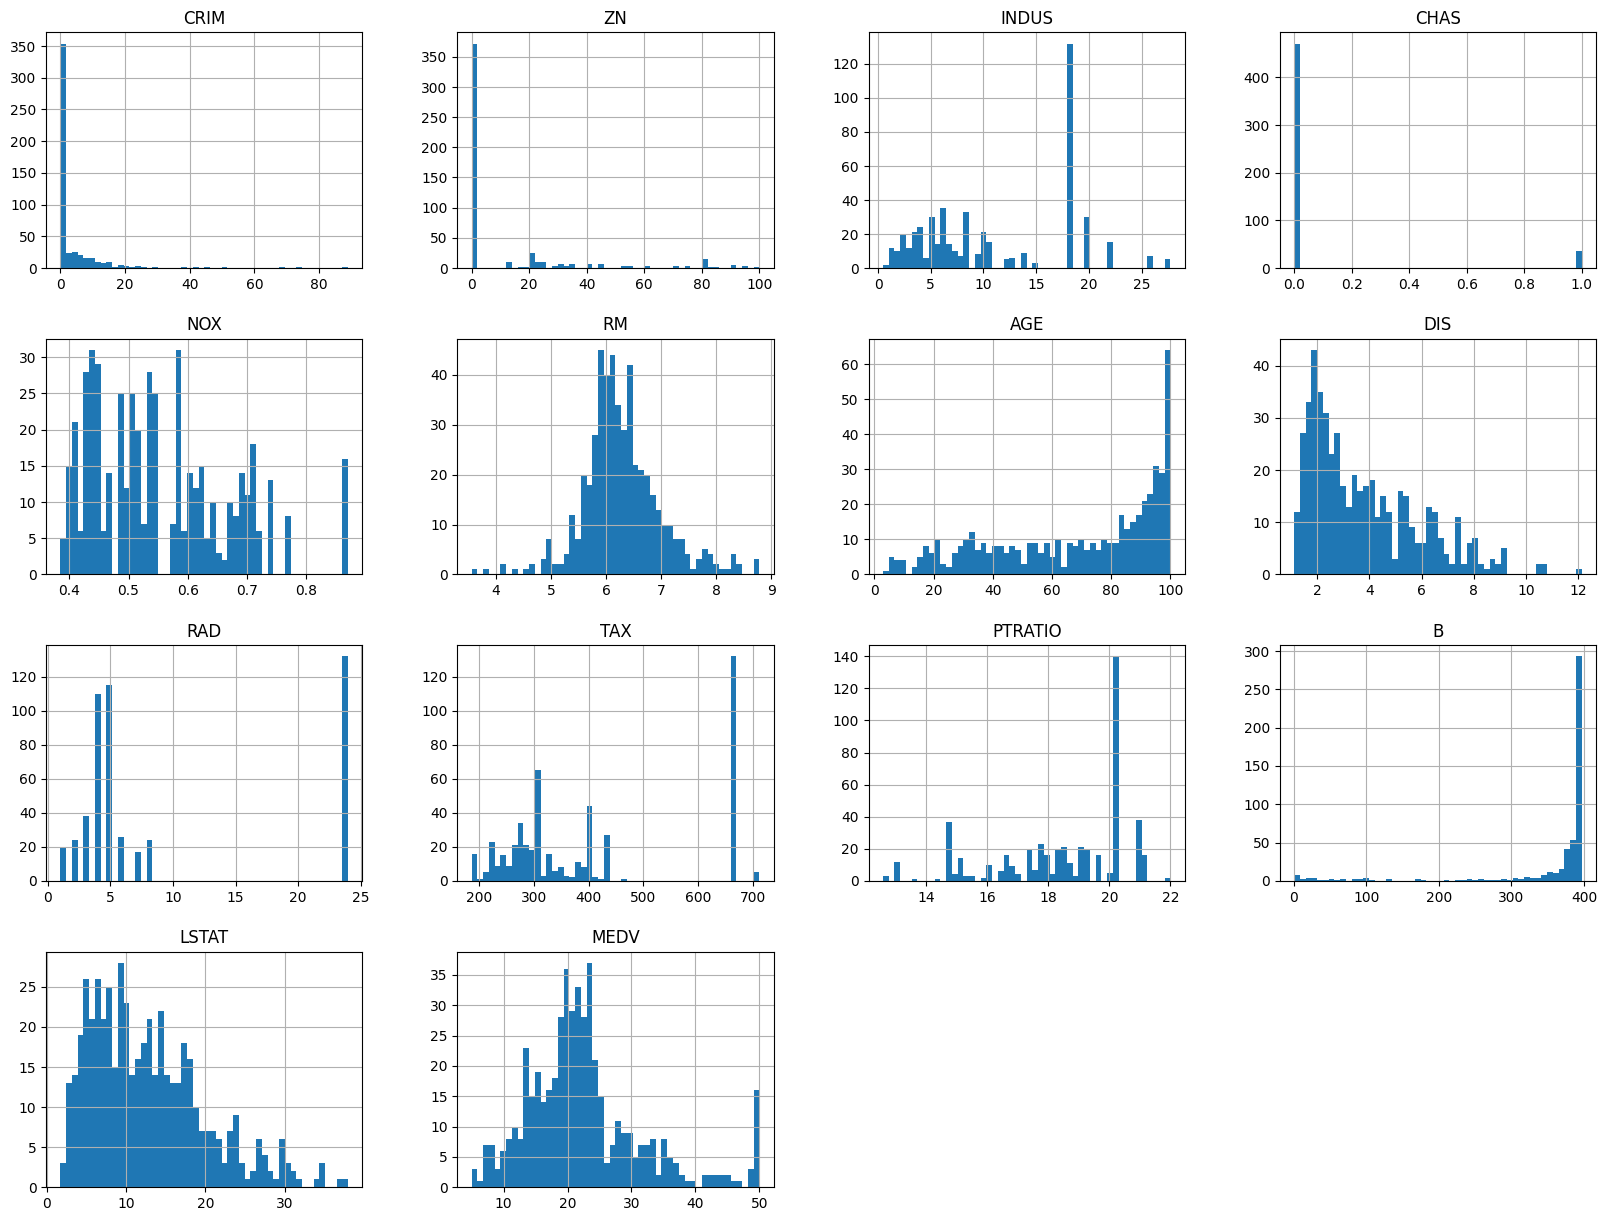

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

#### MANUALLY SPLITTING

In [6]:
# import numpy as np

# def split_train_test(data, test_ratio):  
#     np.random.seed=(42)
#     shuffled= np.random.permutation(len(data))
#     test_set_size= int(len(data)*test_ratio)
#     test_indices= shuffled[:test_set_size]
#     train_indices= shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
# train_set, test_set= split_train_test(housing, 0.2)

In [8]:
# print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")

#### USING SKLEARN 

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}")

In [ ]:
# dividing variable CHAS equally between test and train set using sklearn stratified
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [ ]:
strat_train_set['CHAS'].value_counts()

In [ ]:
strat_test_set['CHAS'].value_counts()

In [ ]:
housing= strat_train_set.copy()

## Looking for Correlations

In [ ]:
corr_matrix=housing.corr()

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying Attribute Combinations 

In [ ]:
housing["TAXRM"]= housing["TAX"]/housing["RM"]
housing["TAXRM"]

In [ ]:
housing.head()

In [ ]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [ ]:
housing= strat_train_set.drop("MEDV", axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Handling Missing Attributes

In [ ]:
# three methods to handle missing attributes
# 1. remove missing data points
# 2. get rid of whole attribute
# 3. set the value to some value (0, mean, median0

In [ ]:
# 1
a=housing.dropna(subset=["RM"])
a.shape

In [ ]:
# 2, removed RM columns
housing.drop("RM", axis=1).shape

In [ ]:
#3
median=housing["RM"].median()
housing["RM"].fillna(median)
housing.shape

In [ ]:
# before imputing
housing.describe()

## Using Imputer to fill in all missing values with median values of the dataset

In [ ]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)

In [ ]:
imputer.statistics_

In [ ]:
x=imputer.transform(housing)
housing_tr=pd.DataFrame(x, columns=housing.columns)
housing_tr.describe()

## Scikit-learn Design

In [ ]:
# three types of objects- 
# 1. estimators- estimates parameter based on dataset, has 'fit' and 'transform' methods
# 2. transformers- transform method takes input and returns output based on the learnings from fit(), also has convenience fn fit_transform() 
# 3. predictors- LinearRegression model etc, has fit() and predict() functions and score() that evaluates predictions

## Feature Scaling

In [ ]:
# Two types of feature scaling methods
# 1. Min-Max Scaling (Normalisation)-  ((value-min)/max-min) all values lie within 0 and 1 after normalisation sklearn provides MinMaxScaler
# 2. Standardisation - ((value-mean)/standard deviation) sklearn class Standard Scaler for this

## Creating a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
# feature scaling
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),     #can add more
    ('std_scaler', StandardScaler()),
])

In [ ]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr  #numpy array

## Selecting a desired model for the real estate 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model= LinearRegression()                        # giving great error
# model= DecisionTreeRegressor()                    # overfitting
model= RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

In [ ]:
some_data=housing.iloc[:5]

In [ ]:
some_labels=housing_labels.iloc[:5]

In [ ]:
prepared_data=my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

In [ ]:
list(some_labels)

## Evaluating the model

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse= mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)
rmse

## Using a better evaluation technique- Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [ ]:
rmse_scores

In [ ]:
def print_scores(scores):
    print("Scores: " , scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

## Model Outputs

### 1. Decision Tree:
#### Mean:  4.1331116697443395
#### Standard Deviation:  0.7999105124088427

### 2. Linear Regression
#### Mean:  5.031413771838464
#### Standard Deviation:  1.0584605919223435

### 3. Random Forest Regressor
#### Mean:  3.303553828642105
#### Standard Deviation:  0.6244075084669768

## Random Forest Model gives the best Output

## Saving the model

In [ ]:
from joblib import dump, load
dump(model, 'RealEstatePrediction.joblib')

## Testing the model on test data

In [ ]:
x_test= strat_test_set.drop("MEDV", axis=1)
y_test= strat_test_set["MEDV"].copy()
x_test_prepared= my_pipeline.transform(x_test)
final_predictions= model.predict(x_test_prepared)
final_mse= mean_squared_error(y_test, final_predictions)
final_rmse= np.sqrt(final_mse)

In [ ]:
final_rmse

In [ ]:
# print(final_predictions, list(y_test), sep="\n")

In [ ]:
prepared_data[0]

In [ ]:
from joblib import dump, load
import numpy as np
model= load("RealEstatePrediction.joblib")
input= np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24119861, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

## Predicting Price using given features

In [ ]:
from joblib import dump, load
import numpy as np
model= load("RealEstatePrediction.joblib")

In [ ]:
input= np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24119861, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)